# Portfolio Optimization for Indian stocks/ETFs

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Ten Indian stocks/ETFs selected : 

1) Nifty Mid Cap 100 

2) Nifty

3) Adani Ports

4) HDFC Bank

5) Indian Oil Corp

6) Maruti Ltd

7) Reliance Industries

8) Tata Steel

9) TCS

10) Titan ltd

In [2]:
symbols = ['^CRSMID', '^NSEI', 'ADANIPORTS.NS', 'HDFCBANK.NS',
           'IOC.NS','MARUTI.NS','RELIANCE.NS','TATASTEEL.NS',
           'TCS.NS','TITAN.NS']

In [3]:
%%time
raw_data = pd.DataFrame()
for symbol in symbols:
    raw_data[symbol] = pd.read_csv("Portofolio Stocks/" + symbol + ".csv", index_col='Date')['Adj Close']

Wall time: 109 ms


In [4]:
raw_data.tail()

,^CRSMID,^NSEI,ADANIPORTS.NS,HDFCBANK.NS,IOC.NS,MARUTI.NS,RELIANCE.NS,TATASTEEL.NS,TCS.NS,TITAN.NS
Date,,,,,,,,,,
2019-07-17,17080.099609,11687.500000,417.049988,2397.449951,146.850006,6075.700195,1281.849976,475.700012,2117.250000,1109.900024
2019-07-18,16791.000000,11596.900391,412.399994,2411.899902,147.600006,5882.350098,1261.849976,466.600006,2065.949951,1080.000000
2019-07-19,16430.099609,11419.250000,405.500000,2375.649902,146.500000,5769.100098,1249.000000,458.049988,2076.949951,1091.050049
2019-07-22,16337.099609,11346.200195,407.200012,2297.250000,147.949997,5912.500000,1280.500000,465.549988,2109.899902,1085.550049
2019-07-23,16243.700195,11331.049805,399.750000,2263.500000,147.350006,5873.750000,1273.550049,459.850006,2112.449951,1099.150024


In [5]:
for symbol in symbols:
    raw_data = raw_data.drop(raw_data[raw_data[symbol]=='null'].index)

In [6]:
raw_data.head()

,^CRSMID,^NSEI,ADANIPORTS.NS,HDFCBANK.NS,IOC.NS,MARUTI.NS,RELIANCE.NS,TATASTEEL.NS,TCS.NS,TITAN.NS
Date,,,,,,,,,,
2014-07-24,10928.500000,7830.600098,270.294220,813.404724,47.140190,2389.133057,487.856049,482.056091,1118.572388,328.721344
2014-07-25,10788.349609,7790.450195,262.794220,806.885925,46.349541,2399.268311,478.858551,473.146088,1123.123901,324.858063
2014-07-28,10753.599609,7748.700195,260.784393,801.139587,45.886547,2395.634766,471.243469,465.424316,1120.328857,327.156433
2014-07-30,10823.549805,7791.399902,258.480499,810.072876,46.164345,2440.526123,471.501251,463.387451,1122.821289,335.127533
2014-07-31,10838.200195,7721.299805,256.413818,805.437256,47.190048,2413.371338,471.641815,469.581818,1116.330933,333.562653


In [7]:
data = pd.DataFrame()
for symbol in symbols:
    data[symbol] = raw_data[symbol].astype(float)

data.index = pd.to_datetime(data.index)

In [8]:
data = data[data.index > '2017-07-01']

### Data is shown in normalized fashion graphically

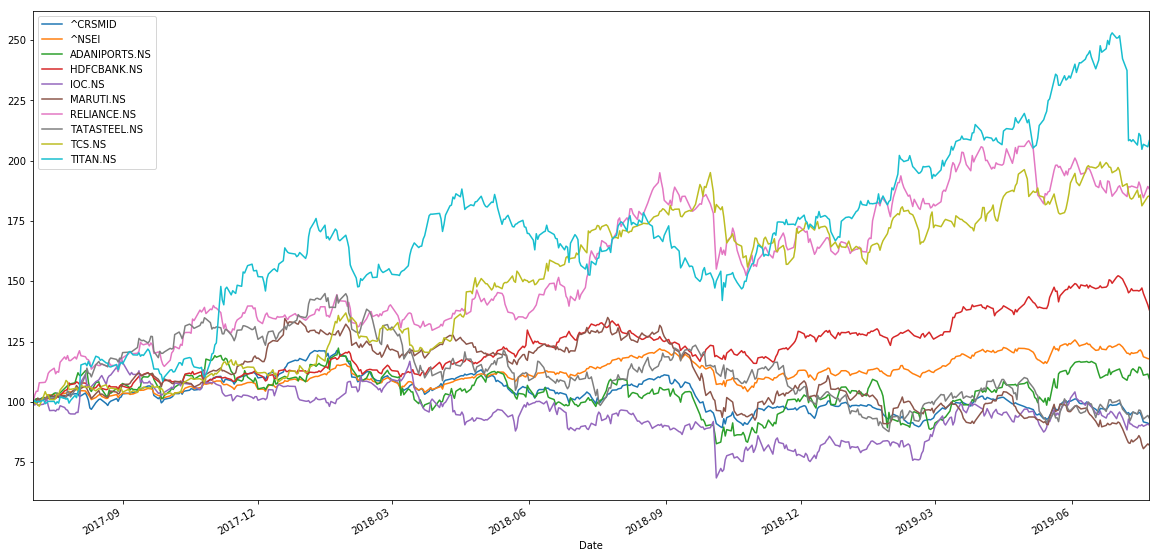

In [9]:
(data/data.iloc[0]*100).plot(figsize=(20,10))

In [10]:
returns = np.log(data / data.shift(1))

## Annualized returns and covariance matrix calculated based on 252 trading days

In [11]:
returns.mean() * 252

^CRSMID         -0.048949
^NSEI            0.082603
ADANIPORTS.NS    0.045810
HDFCBANK.NS      0.162719
IOC.NS          -0.050430
MARUTI.NS       -0.099166
RELIANCE.NS      0.318358
TATASTEEL.NS    -0.035046
TCS.NS           0.310522
TITAN.NS         0.369229
dtype: float64

In [12]:
returns.cov() * 252

,^CRSMID,^NSEI,ADANIPORTS.NS,HDFCBANK.NS,IOC.NS,MARUTI.NS,RELIANCE.NS,TATASTEEL.NS,TCS.NS,TITAN.NS
^CRSMID,0.027265,0.015939,0.028012,0.008609,0.021472,0.021550,0.018088,0.029662,0.002219,0.018095
^NSEI,0.015939,0.014602,0.019243,0.010953,0.018737,0.016826,0.019250,0.021020,0.006732,0.013037
ADANIPORTS.NS,0.028012,0.019243,0.099793,0.011663,0.021733,0.024702,0.025133,0.031241,0.002923,0.014824
HDFCBANK.NS,0.008609,0.010953,0.011663,0.024715,0.009590,0.011961,0.011228,0.012928,0.002761,0.009839
IOC.NS,0.021472,0.018737,0.021733,0.009590,0.122196,0.022425,0.026031,0.030064,-0.001355,0.014420
MARUTI.NS,0.021550,0.016826,0.024702,0.011961,0.022425,0.057351,0.016940,0.026687,0.002029,0.017449
RELIANCE.NS,0.018088,0.019250,0.025133,0.011228,0.026031,0.016940,0.064491,0.024019,0.006800,0.016611
TATASTEEL.NS,0.029662,0.021020,0.031241,0.012928,0.030064,0.026687,0.024019,0.098286,0.003515,0.020575
TCS.NS,0.002219,0.006732,0.002923,0.002761,-0.001355,0.002029,0.006800,0.003515,0.054219,0.004980
TITAN.NS,0.018095,0.013037,0.014824,0.009839,0.014420,0.017449,0.016611,0.020575,0.004980,0.095491


### Markowitz Portfolio Theory have 2 main objects :

Expected Portfolio returns

Expected Portfolio variance

In [13]:
portfolio_returns = []
portfolio_volatilities = []

for iteration in range (50000):
    
    stock_weights = np.random.uniform(0,1,len(symbols))
    stock_weights = stock_weights/np.sum(stock_weights)
    
    portfolio_returns.append(np.sum(returns.mean() * stock_weights) * 252)
    portfolio_volatilities.append(np.sqrt(np.dot(stock_weights.T, np.dot(returns.cov() * 252, stock_weights))))
                                    
portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities = np.array(portfolio_volatilities)

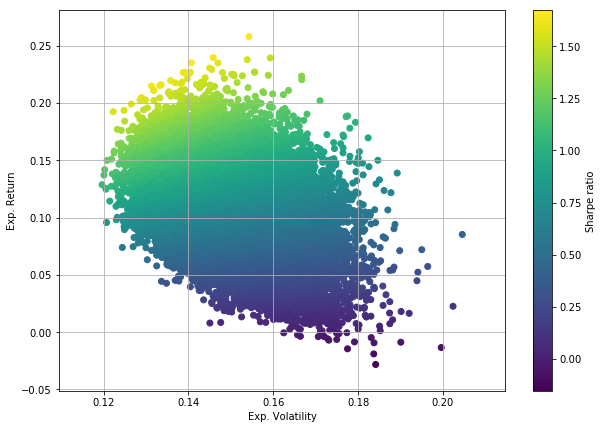

In [14]:
plt.figure(figsize=(10, 7))
plt.scatter(portfolio_volatilities, portfolio_returns, c=portfolio_returns / portfolio_volatilities, marker='o')
plt.grid(True)
plt.xlabel('Exp. Volatility')
plt.ylabel('Exp. Return')
plt.colorbar(label='Sharpe ratio')

### Scipy minimize function will be used to optimize the weights of stocks to achieve 

1) max Sharpe Ratio 

2) min Variance on Portfolio

3) targeted returns based on historical returns

In [15]:
import scipy.optimize as sco

In [16]:
def portfolioAnalytics(stock_weights):
    
    ''' 
    Parameters : Stock Weights    
    Returns : Returns Portfolios return, variance and Sharpe ratio
    '''
    weights = np.array(stock_weights)
    portfolio_return = np.sum(returns.mean() * weights) * 252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    sharpe_ratio = portfolio_return/portfolio_volatility
    
    return np.array([portfolio_return, portfolio_volatility, sharpe_ratio])

In [17]:
def min_variance_for_portfolio(stock_weights):
    return portfolioAnalytics(stock_weights)[1] # returns minimum Variance of Portfolio

In [18]:
def min_sharpe_ratio_for_portfolio(stock_weights):
    return -portfolioAnalytics(stock_weights)[2] # returns -ve minimum ( Max ) Sharpe Ratio

In [19]:
constraints = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1}) # Sum of weights ratio is 1
boundaries  = tuple((0, 1) for x in stock_weights) # Each stock weights will be between 0-1

In [20]:
max_sharpe_optimized_weights = sco.minimize(min_sharpe_ratio_for_portfolio, len(symbols) * [1. / len(symbols)], 
                                            bounds=boundaries, constraints=constraints)

In [21]:
max_sharpe_optimized_weights

     fun: -2.022055932719147
     jac: array([ 1.37921199e+00,  5.94942659e-01,  9.03385639e-01, -1.70528889e-04,
        1.39432961e+00,  1.77330741e+00,  1.96397305e-04,  1.61135200e+00,
       -1.80631876e-04,  3.26007605e-04])
 message: 'Optimization terminated successfully.'
    nfev: 121
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([3.81494570e-16, 6.06417140e-16, 1.36518205e-17, 2.48626210e-01,
       2.10371569e-16, 0.00000000e+00, 2.17655904e-01, 0.00000000e+00,
       3.44055165e-01, 1.89662720e-01])

In [22]:
max_sharpe_optimized_weights['x'].round(2) # Optimized weights for Max Sharpe Ratio

array([0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.22, 0.  , 0.34, 0.19])

In [23]:
min_volatility_optimized_weights = sco.minimize(min_variance_for_portfolio, len(symbols) * [1. / len(symbols)], 
                                            bounds=boundaries, constraints=constraints)

In [24]:
min_volatility_optimized_weights

     fun: 0.11254637819480513
     jac: array([0.11244087, 0.11252188, 0.13640392, 0.1125927 , 0.12265518,
       0.12200034, 0.13870333, 0.15021911, 0.11260801, 0.11243179])
 message: 'Optimization terminated successfully.'
    nfev: 192
     nit: 16
    njev: 16
  status: 0
 success: True
       x: array([2.49066214e-02, 5.94661446e-01, 0.00000000e+00, 2.17583192e-01,
       0.00000000e+00, 2.05456312e-17, 1.08420217e-18, 3.17129135e-17,
       1.46287496e-01, 1.65612443e-02])

In [25]:
min_volatility_optimized_weights['x'].round(2) # Optimized weights for Min Variance of Portfolio

array([0.02, 0.59, 0.  , 0.22, 0.  , 0.  , 0.  , 0.  , 0.15, 0.02])

In [26]:
def min_variance_for_targeted_returns(stock_weights):
    return portfolioAnalytics(stock_weights)[1]

In [33]:
target_returns = np.linspace(0.0, 0.35, 50)
target_volatilities = []
for target_return in target_returns:
    
    ## Extra Constraint added as optimized weights needed for specific return % 
    
    constraints = ({'type': 'eq', 'fun': lambda x:  portfolioAnalytics(x)[0] - target_return},
                   {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    boundaries  = tuple((0, 1) for x in stock_weights)
    
    res = sco.minimize(min_variance_for_targeted_returns, len(symbols) * [1. / len(symbols)], bounds=boundaries, constraints=constraints)
                       
    target_volatilities.append(res['fun'])
    
target_volatilities = np.array(target_volatilities)

### Efficient Frontier is drawn with minimal Variance for Targeted Returns along with Max Sharpe Ratio ( Red Star) and Min Variance (Blue Star)

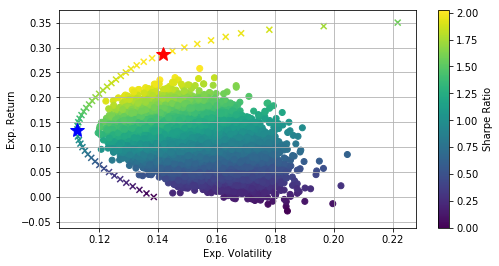

In [35]:
plt.figure(figsize=(8, 4))

plt.scatter(portfolio_volatilities, portfolio_returns, c=portfolio_returns / portfolio_volatilities, marker='o')

plt.scatter(target_volatilities, target_returns, c=target_returns / target_volatilities, marker='x')

plt.plot(portfolioAnalytics(max_sharpe_optimized_weights['x'])[1], portfolioAnalytics(max_sharpe_optimized_weights['x'])[0],
         'r*', markersize=15.0)

plt.plot(portfolioAnalytics(min_volatility_optimized_weights['x'])[1], portfolioAnalytics(min_volatility_optimized_weights['x'])[0],
         'b*', markersize=15.0)

plt.grid(True)
plt.xlabel('Exp. Volatility')
plt.ylabel('Exp. Return')
plt.colorbar(label='Sharpe Ratio')